<a href="https://colab.research.google.com/github/agarwalsourabh55/Deep-learning/blob/main/endtoendNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Started

In [1]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu sklearn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cpu
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=7f6e279fd301273c681f75a78d567128d5da4028cbc5c0863f953e816205d9c5
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [2]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F

In [5]:
from sklearn.datasets import make_classification
X,Y = make_classification(
    n_features=4,
    n_redundant=0,
    n_informative=3,
    n_clusters_per_class=2,
    n_classes=3)


In [12]:
print(f"Shape of the dataset\nRows {X.shape[0]} \nColumns: {X.shape[1]}")


Shape of the dataset
Rows 100 
Columns: 4


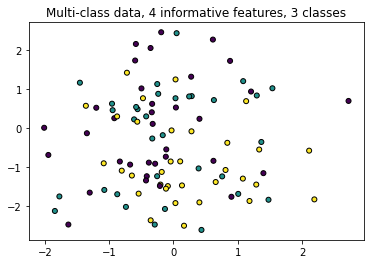

In [13]:
import matplotlib.pyplot as plt
plt.title("Multi-class data, 4 informative features, 3 classes",
          fontsize="large")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")


*   Dataset is distributed in 2 dimensional space with starting 2 columns.
*   The target class has 3 categories overall that we will consider as the ground truth for trainin  our model.
*   Yellow, black, dark blue is seggregating the data.




### Using Dataloader for loading the dataset

Torch Proccesses the data in the Tensor format

*   Torch Processes the data in the tensor format
*   TorchDataset will return the data in the tensor format
*   TorchDataloader will load the dataset in the small batches.
*   Randomization of the data is always good as it will help oyu in building more generalized and robust model(shuffle argument)
*   For CUDA enabled machine we can use pin_memory argument it will help us in trasferring data from cpu to gpu while training using page_locked memory
*   For Creating the custom dataset class: Make 3 abstract methods
1.   __init__ : pass the data or reference with label data
2.   __getitem__: this function return one input and corresponding label at a time
3. len return the size of the dataset
Note:
*   Do not read whole data if your data is very large to fit into the memory
*   Store the reference of the data and load it during the time of each epoch,will help in overcoming the memor issue
*   But if you load the data directly from the CPU/GPU then it will increase the training speed
*   We are loading the data into the memor while iterating through the epoch, this is how we are going to resolve the memor issue and this is also calles lazy loading
*   When we load all our data into the memor at once then that is earl loading.














In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print("Checking the size of each dataset we created:",X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Checking the size of each dataset we created: (67, 4) (33, 4) (67,) (33,)


In [64]:
import torch
import numpy as np
X_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(np.asarray(Y_test))

In [65]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.X=torch.from_numpy(X_train)
        self.Y=torch.from_numpy(Y_train)
        self.len=self.X.shape[0]
    def __getitem__(self,index):      
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len

data=Data()
loader=DataLoader(dataset=data,
                  batch_size=64)

In [67]:
for batch in loader.:
  print(batch)

TypeError: ignored

In [24]:
print(data.X[0:5])
print(data.X.shape)
print(data.Y[0:5])
print(data.Y.shape)

tensor([[-0.4966,  1.0083,  0.1946, -0.2965],
        [-0.4260, -1.3531,  2.1120, -0.7596],
        [ 0.0334,  1.2386, -0.3578, -2.9794],
        [-0.1811, -1.1341, -0.7779, -0.9337],
        [-0.3533, -2.3755, -0.2026,  2.2328]], dtype=torch.float64)
torch.Size([67, 4])
tensor([0, 0, 2, 2, 2])
torch.Size([67])


### Building the Neural Network

In [25]:
input_dim=4     # how many Variables are in the dataset
hidden_dim = 25 # hidden layers
output_dim=3    # number of classes

#### Defining the neural network class.

In [26]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self,input,H,output):
        super(Net,self).__init__()
        self.linear1=nn.Linear(input,H)
        self.linear2=nn.Linear(H,output)
 
        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x


#### Instantiating the Classifier


In [27]:
clf=Net(input_dim,hidden_dim,output_dim)

In [28]:
print(clf.parameters)

<bound method Module.parameters of Net(
  (linear1): Linear(in_features=4, out_features=25, bias=True)
  (linear2): Linear(in_features=25, out_features=3, bias=True)
)>


#### Defining the Criteria to calculate the gradients and optimizers of the parameters

In [29]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(clf.parameters(), lr=0.1)

In [42]:
import torch
x.to(torch.float32)

tensor([[-4.9657e-01,  1.0083e+00,  1.9462e-01, -2.9647e-01],
        [-4.2599e-01, -1.3531e+00,  2.1120e+00, -7.5959e-01],
        [ 3.3400e-02,  1.2386e+00, -3.5776e-01, -2.9794e+00],
        [-1.8107e-01, -1.1341e+00, -7.7785e-01, -9.3372e-01],
        [-3.5328e-01, -2.3755e+00, -2.0256e-01,  2.2328e+00],
        [-1.3013e+00, -1.6647e+00,  1.7112e+00,  3.6810e-01],
        [-6.4563e-01, -1.2269e+00, -1.0530e+00,  1.3256e+00],
        [ 1.1315e+00,  6.8197e-01, -3.6999e-01, -1.2963e+00],
        [-5.4082e-01, -1.6908e+00, -5.4336e-01,  6.0903e-01],
        [-4.7313e-01,  7.5652e-01, -6.4478e-01, -1.9986e+00],
        [ 3.1930e-02, -1.9336e+00, -1.6210e+00, -1.2194e+00],
        [ 1.2970e+00,  8.2683e-01, -2.4717e+00,  2.2172e+00],
        [-1.8962e-01,  2.4493e+00,  9.4156e-01,  4.3224e-01],
        [ 1.3345e+00, -5.5939e-01, -9.3159e-01, -3.7275e-02],
        [-9.1889e-01,  2.4406e-01, -6.3099e-01, -6.0095e-01],
        [-5.9486e-01,  1.7246e+00,  2.0841e+00, -8.7318e-01],
        

In [59]:
for batch in loader:
  print(batch)
  print('g')

[tensor([[-4.9657e-01,  1.0083e+00,  1.9462e-01, -2.9647e-01],
        [-4.2599e-01, -1.3531e+00,  2.1120e+00, -7.5959e-01],
        [ 3.3400e-02,  1.2386e+00, -3.5776e-01, -2.9794e+00],
        [-1.8107e-01, -1.1341e+00, -7.7785e-01, -9.3372e-01],
        [-3.5328e-01, -2.3755e+00, -2.0256e-01,  2.2328e+00],
        [-1.3013e+00, -1.6647e+00,  1.7112e+00,  3.6810e-01],
        [-6.4563e-01, -1.2269e+00, -1.0530e+00,  1.3256e+00],
        [ 1.1315e+00,  6.8197e-01, -3.6999e-01, -1.2963e+00],
        [-5.4082e-01, -1.6908e+00, -5.4336e-01,  6.0903e-01],
        [-4.7313e-01,  7.5652e-01, -6.4478e-01, -1.9986e+00],
        [ 3.1930e-02, -1.9336e+00, -1.6210e+00, -1.2194e+00],
        [ 1.2970e+00,  8.2683e-01, -2.4717e+00,  2.2172e+00],
        [-1.8962e-01,  2.4493e+00,  9.4156e-01,  4.3224e-01],
        [ 1.3345e+00, -5.5939e-01, -9.3159e-01, -3.7275e-02],
        [-9.1889e-01,  2.4406e-01, -6.3099e-01, -6.0095e-01],
        [-5.9486e-01,  1.7246e+00,  2.0841e+00, -8.7318e-01],
       

In [53]:
learning_rate = 1e-1
loss_list = []

for i in range(1000):
  for x,y in loader:
      print(x)
      x = x.to(torch.float32)  ## Need to convert into this as it doesn;t support float 64
      y_pred = clf(x)
      loss = criterion(y_pred, y)
      loss_list.append(loss.item())
      clf.zero_grad()
      loss.backward()
      with torch.no_grad():
          for param in clf.parameters():
              param -= learning_rate * param.grad


Streaming output truncated to the last 5000 lines.
        [ 2.4525e-01,  8.0216e-01,  8.6060e-01,  1.7865e+00],
        [-1.7732e+00, -1.7631e+00,  1.0019e+00,  8.1579e-01],
        [-3.5496e-01,  2.0448e+00,  3.6440e+00, -1.7760e+00],
        [-6.1094e-01,  2.1448e-01,  1.5293e+00,  1.5565e+00],
        [-2.8470e-02, -6.9116e-02, -8.4020e-01, -6.8231e-01],
        [ 1.3370e-01, -1.4805e+00, -9.3931e-01,  5.0478e-01],
        [ 9.0258e-01, -1.7713e+00,  2.5345e+00,  2.4356e-01],
        [-3.2829e-01, -2.7670e-01,  9.0668e-01, -5.0458e-01],
        [-1.4542e+00,  1.1549e+00,  4.3995e-01, -6.0187e-02],
        [ 1.3679e+00, -3.6557e-01,  1.7830e+00,  1.1154e+00],
        [-8.6186e-02, -1.4979e+00, -6.4930e-01,  1.4400e+00],
        [ 3.9173e-02,  5.1840e-01, -6.9505e-01, -3.4623e-01],
        [-1.8432e+00, -2.1357e+00,  9.5961e-01,  7.2364e-01],
        [ 4.0459e-01, -1.9156e+00, -1.3684e+00, -1.2124e+00],
        [-7.3813e-01, -2.0310e+00,  2.3212e-01,  8.9405e-01],
        [ 6.5800e-0

[0.44927722215652466,
 0.09446551650762558,
 0.4489818811416626,
 0.09437945485115051,
 0.44868671894073486,
 0.09429347515106201,
 0.44839173555374146,
 0.09420758485794067,
 0.4480968713760376,
 0.09412186592817307,
 0.4478021264076233,
 0.09403615444898605,
 0.4475075304508209,
 0.09395059198141098,
 0.4472130239009857,
 0.09386515617370605,
 0.4469187557697296,
 0.09377974271774292,
 0.4466245770454407,
 0.09369447827339172,
 0.44633060693740845,
 0.09360931068658829,
 0.4460366368293762,
 0.0935242548584938,
 0.4457429349422455,
 0.09343928843736649,
 0.4454494118690491,
 0.09335438162088394,
 0.44515588879585266,
 0.09326955676078796,
 0.44486263394355774,
 0.0931849256157875,
 0.4445694386959076,
 0.09310034662485123,
 0.4442763924598694,
 0.09301585704088211,
 0.4439835250377655,
 0.09293141961097717,
 0.44369080662727356,
 0.09284720569849014,
 0.44339826703071594,
 0.09276294708251953,
 0.44310590624809265,
 0.09267887473106384,
 0.44281357526779175,
 0.09259478002786636,
 0.

ValueError: ignored

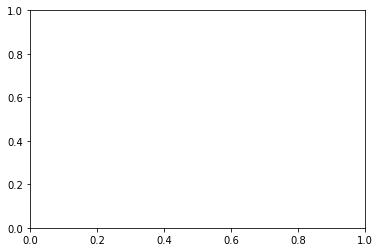

In [45]:
step = np.linspace(0,1000,1000)
plt.plot(step,np.array(loss_list))